Say Cities is an n x 2 array of [latitide,longitude] coordinates, like

    Paris = [48.9, 2.4] 
    Rome = [41.9, 12.5] 
    Greenwich = [51.5, 0] 
    Cities = np.array([ Paris, Rome, Greenwich ]) 


and A is a 91 x 360 array of temperatures at integer [lat,long] -- A[0] along the equator, A[:,0] along the prime meridian through Greenwich. 

Then 

    z = scipy.ndimage.map_coordinates( A, Cities.T, order=order ) 


is the 3 temperatures at Paris, Rome and Greenwich -- approximately, depending on order. 
The transpose Cities.T is used because map_coordinates takes columns, not rows. ("RuntimeError: invalid shape for coordinate array" may mean that you forgot the .T .) 

* If order is 0, map_coordinates rounds [lat,long] to the nearest integers: the temperature at Paris is approximated by A[50,2]. 

* If 1, it does bilinear interpolation in the square with corners A[48,2], A[48,3], A[49,2], A[49,3] for Paris. 
* If 2, it does quadratic interpolation over the 9 points A[48:51, 1:4]. And so on, up to order 5; the default is order=3 (Catmull-Rom ?) 
* Order 1, bilinear, is much faster than 2 or 3. 

What happens to A[51,-1] etc. west of Greenwich ?  See the mode= option. 

Of course the values in A may be arrays -- colors, sounds, anything that can be blended or interpolated -- not just scalars. 

Links: 

http://docs.scipy.org/doc/scipy/reference/tutorial/ndimage.html
http://www.scipy.org/Cookbook/Interpolation
http://en.wikipedia.org/wiki/Multivariate_interpolation ff. 

For an introduction to interpolation methods, see ... NR ? 

For the reverse problem of turning scattered data to a regular grid, 
see 
http://matplotlib.sourceforge.net/api/mlab_api.html#matplotlib.mlab.griddata
. 

In [1]:
import numpy as np

In [3]:
grid = np.array([[1,2,3],[6,5,4],[3,6,9]])

In [4]:
grid

array([[1, 2, 3],
       [6, 5, 4],
       [3, 6, 9]])

In [22]:
bilinear_interpolate(grid,[0,0,0],[0,1,1.9])

array([ 1. ,  6. ,  3.3])

In [24]:
grid[0,1]

2

In [25]:
from scipy import ndimage


In [51]:
points = np.array([[0.5,1.5],[1.3,1.5]])

In [71]:
points = np.array([[1,0.5],[0.5,1]])

In [72]:
points.T

array([[ 1. ,  0.5],
       [ 0.5,  1. ]])

In [73]:
z = ndimage.map_coordinates( grid, points.T, order=1 ) 

In [74]:
z

array([6, 4])

In [79]:
import matplotlib.mlab as mlab

In [81]:
grid2 = mlab.griddata(np.array(1), np.array(.5), np.array(6), 3, 3, interp='linear')

ValueError: x, y and z must be equal-length 1-D arrays

In [83]:
%matplotlib inline

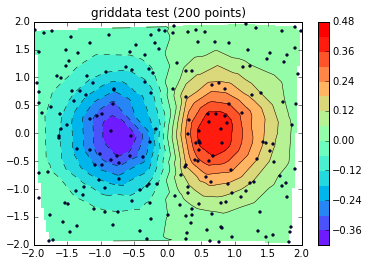

In [84]:
from numpy.random import uniform, seed
from matplotlib.mlab import griddata
import matplotlib.pyplot as plt
import numpy as np
# make up data.
#npts = int(raw_input('enter # of random points to plot:'))
seed(0)
npts = 200
x = uniform(-2, 2, npts)
y = uniform(-2, 2, npts)
z = x*np.exp(-x**2 - y**2)
# define grid.
xi = np.linspace(-2.1, 2.1, 100)
yi = np.linspace(-2.1, 2.1, 200)
# grid the data.
zi = griddata(x, y, z, xi, yi, interp='linear')
# contour the gridded data, plotting dots at the nonuniform data points.
CS = plt.contour(xi, yi, zi, 15, linewidths=0.5, colors='k')
CS = plt.contourf(xi, yi, zi, 15, cmap=plt.cm.rainbow,
                  vmax=abs(zi).max(), vmin=-abs(zi).max())
plt.colorbar()  # draw colorbar
# plot data points.
plt.scatter(x, y, marker='o', c='b', s=5, zorder=10)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title('griddata test (%d points)' % npts)
plt.show()